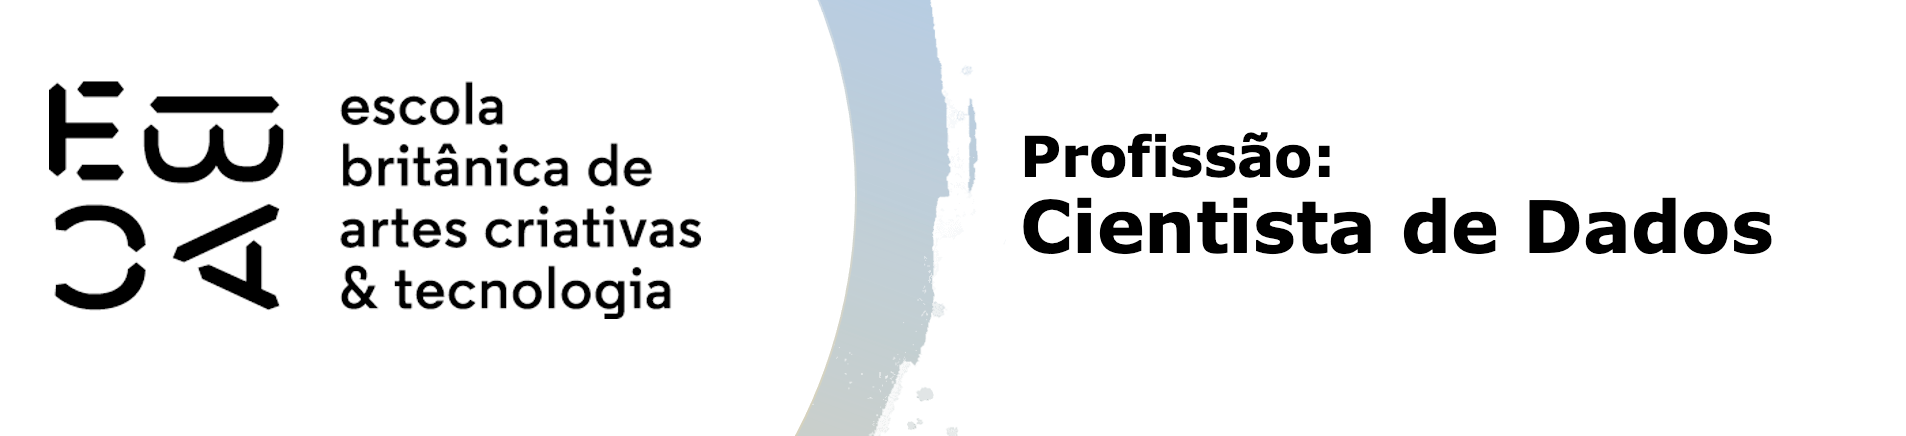

# Tarefa I

Neste projeto, estamos construindo um credit scoring para cartão de crédito, em um desenho amostral com 15 safras, e utilizando 12 meses de performance.

Carregue a base de dados ```credit_scoring.ftr```.

In [1]:
import pandas as pd

df = pd.read_feather('credit_scoring.ftr')
df.head()

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda,mau
0,2015-01-01,5733,F,N,N,0,Empresário,Médio,Solteiro,Casa,43,6.873973,1.0,2515.39,False
1,2015-01-01,727,F,S,S,0,Assalariado,Médio,Casado,Casa,35,4.526027,2.0,3180.19,False
2,2015-01-01,6374,F,N,N,2,Assalariado,Médio,Casado,Casa,31,0.243836,4.0,1582.29,False
3,2015-01-01,9566,F,N,N,0,Assalariado,Médio,Casado,Casa,54,12.772603,2.0,13721.17,False
4,2015-01-01,9502,F,S,N,0,Assalariado,Superior incompleto,Solteiro,Casa,31,8.432877,1.0,2891.08,False


## Amostragem

Separe os três últimos meses como safras de validação *out of time* (oot).

Variáveis:<br>
Considere que a variável ```data_ref``` não é uma variável explicativa, é somente uma variável indicadora da safra, e não deve ser utilizada na modelagem. A variávei ```index``` é um identificador do cliente, e também não deve ser utilizada como covariável (variável explicativa). As restantes podem ser utilizadas para prever a inadimplência, incluindo a renda.


In [1]:
import pandas as pd

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Ordenar os dados pela data_ref
df = df.sort_values(by='data_ref')

# Identificar as últimas três safras (meses) para validação
oot_months = df['data_ref'].unique()[-3:]

# Separar as safras de validação (oot)
df_oot = df[df['data_ref'].isin(oot_months)]

# Separar os dados restantes para treinamento e validação interna
df_train = df[~df['data_ref'].isin(oot_months)]

# Remover as variáveis não explicativas
X_train = df_train.drop(columns=['data_ref', 'index', 'mau'])
y_train = df_train['mau']

X_oot = df_oot.drop(columns=['data_ref', 'index', 'mau'])
y_oot = df_oot['mau']

# Verificação dos dados
print("Treinamento:")
print(X_train.head())
print(y_train.head())

print("\nValidação Out of Time:")
print(X_oot.head())
print(y_oot.head())











Treinamento:
      sexo posse_de_veiculo posse_de_imovel  qtd_filhos   tipo_renda  \
0        F                N               N           0   Empresário   
33328    M                S               S           1  Assalariado   
33329    F                N               N           0  Assalariado   
33330    M                N               S           1  Assalariado   
33331    F                N               S           1  Assalariado   

                  educacao estado_civil tipo_residencia  idade  tempo_emprego  \
0                    Médio     Solteiro            Casa     43       6.873973   
33328                Médio       Casado            Casa     41       8.134247   
33329    Superior completo     Solteiro            Casa     26       1.424658   
33330  Superior incompleto       Casado            Casa     37      15.449315   
33331                Médio       Casado            Casa     30       0.369863   

       qt_pessoas_residencia     renda  
0                        1

## Descritiva básica univariada

- Descreva a base quanto ao número de linhas, número de linhas para cada mês em ```data_ref```.
- Faça uma descritiva básica univariada de cada variável. Considere as naturezas diferentes: qualitativas e quantitativas.

In [2]:
import pandas as pd

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Número total de linhas
total_rows = len(df)
print(f"Número total de linhas: {total_rows}")

# Número de linhas por mês em data_ref
lines_per_month = df['data_ref'].value_counts().sort_index()
print("\nNúmero de linhas por mês em data_ref:")
print(lines_per_month)

# Identificar variáveis qualitativas
qualitative_vars = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

print("\nDescritiva Básica das Variáveis Qualitativas:")
for var in qualitative_vars:
    print(f"\n{var}:")
    print(df[var].value_counts())

# Identificar variáveis quantitativas
quantitative_vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

print("\nDescritiva Básica das Variáveis Quantitativas:")
print(df[quantitative_vars].describe())



Número total de linhas: 750000

Número de linhas por mês em data_ref:
data_ref
2015-01-01    50000
2015-02-01    50000
2015-03-01    50000
2015-04-01    50000
2015-05-01    50000
2015-06-01    50000
2015-07-01    50000
2015-08-01    50000
2015-09-01    50000
2015-10-01    50000
2015-11-01    50000
2015-12-01    50000
2016-01-01    50000
2016-02-01    50000
2016-03-01    50000
Name: count, dtype: int64

Descritiva Básica das Variáveis Qualitativas:

sexo:
sexo
F    504580
M    245420
Name: count, dtype: int64

posse_de_veiculo:
posse_de_veiculo
N    457954
S    292046
Name: count, dtype: int64

posse_de_imovel:
posse_de_imovel
S    503692
N    246308
Name: count, dtype: int64

tipo_renda:
tipo_renda
Assalariado         385740
Empresário          172712
Pensionista         126265
Servidor público     64922
Bolsista               361
Name: count, dtype: int64

educacao:
educacao
Médio                  506836
Superior completo      204306
Superior incompleto     29471
Fundamental          

## Descritiva bivariada

Faça uma análise descritiva bivariada de cada variável

In [3]:
import pandas as pd

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Visualizar os primeiros registros
df.head()

# Identificar variáveis qualitativas
qualitative_vars = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

print("\nAnálise Bivariada das Variáveis Qualitativas vs. 'mau':")
for var in qualitative_vars:
    print(f"\n{var} vs. 'mau':")
    crosstab = pd.crosstab(df[var], df['mau'], normalize='index') * 100
    print(crosstab)

# Identificar variáveis quantitativas
quantitative_vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']

print("\nAnálise Bivariada das Variáveis Quantitativas vs. 'mau':")
for var in quantitative_vars:
    print(f"\n{var} vs. 'mau':")
    group_stats = df.groupby('mau')[var].agg(['mean', 'std'])
    print(group_stats)








Análise Bivariada das Variáveis Qualitativas vs. 'mau':

sexo vs. 'mau':
mau       False     True 
sexo                     
F     91.947759  8.052241
M     92.660337  7.339663

posse_de_veiculo vs. 'mau':
mau                   False     True 
posse_de_veiculo                     
N                 92.121043  7.878957
S                 92.274847  7.725153

posse_de_imovel vs. 'mau':
mau                  False     True 
posse_de_imovel                     
N                91.152135  8.847865
S                92.684021  7.315979

tipo_renda vs. 'mau':
mau                   False     True 
tipo_renda                           
Assalariado       91.908280  8.091720
Bolsista          95.844875  4.155125
Empresário        92.354903  7.645097
Pensionista       91.731675  8.268325
Servidor público  94.191491  5.808509

educacao vs. 'mau':
mau                      False     True 
educacao                                
Fundamental          90.833819  9.166181
Médio                91.963870  

## Desenvolvimento do modelo

Desenvolva um modelo de *credit scoring* através de uma regressão logística.

- Trate valores missings e outliers
- Trate 'zeros estruturais'
- Faça agrupamentos de categorias conforme vimos em aula
- Proponha uma equação preditiva para 'mau'
- Caso hajam categorias não significantes, justifique

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Verificar valores missing
df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)

# Função para detectar outliers utilizando o IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Aplicar a função para cada variável quantitativa
quantitative_vars = ['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']
for var in quantitative_vars:
    df = remove_outliers(df, var)

# Agrupamento de categorias para 'estado_civil' como exemplo
df['estado_civil'] = df['estado_civil'].replace({'Solteiro': 'Solteiro/Separado', 'Separado': 'Solteiro/Separado'})

# Selecionar variáveis explicativas e target
X = df.drop(columns=['data_ref', 'index', 'mau'])
y = df['mau']

# Codificação das variáveis categóricas
X = pd.get_dummies(X, drop_first=True)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajuste do modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Coeficientes do modelo
coefficients = model.coef_[0]
features = X.columns
equation = "Logit(mau) = " + " + ".join([f"{coeff:.3f}*{feature}" for coeff, feature in zip(coefficients, features)])
print("Equação preditiva:")
print(equation)

# Reajustar o modelo utilizando statsmodels para avaliar significância
X_train_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_train_sm).fit()
print(logit_model.summary())

# Identificar variáveis não significantes
insignificant_vars = logit_model.pvalues[logit_model.pvalues > 0.05].index
print(f"Variáveis não significantes (p > 0.05): {insignificant_vars}")









/var/folders/sn/d8qmg6ks1ts4wgxf8nzfv6lr0000gn/T/ipykernel_3830/1511619467.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tempo_emprego'].fillna(df['tempo_emprego'].median(), inplace=True)


[[170591      0]
 [ 16949      0]]
              precision    recall  f1-score   support

       False       0.91      1.00      0.95    170591
        True       0.00      0.00      0.00     16949

    accuracy                           0.91    187540
   macro avg       0.45      0.50      0.48    187540
weighted avg       0.83      0.91      0.87    187540

Equação preditiva:
Logit(mau) = -0.000*qtd_filhos + -0.000*idade + -0.087*tempo_emprego + -0.002*qt_pessoas_residencia + -1.308*renda + -0.037*sexo_M + 0.008*posse_de_veiculo_S + -0.035*posse_de_imovel_S + -0.001*tipo_renda_Bolsista + -0.018*tipo_renda_Empresário + -0.016*tipo_renda_Pensionista + -0.001*tipo_renda_Servidor público + -0.008*educacao_Médio + -0.006*educacao_Pós graduação + -0.020*educacao_Superior completo + -0.008*educacao_Superior incompleto + 0.001*estado_civil_Solteiro/Separado + 0.012*estado_civil_União + -0.007*estado_civil_Viúvo + -0.011*tipo_residencia_Casa + -0.011*tipo_residencia_Com os pais + -0.009*tipo_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Optimization terminated successfully.
         Current function value: 0.275709
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                    mau   No. Observations:               437593
Model:                          Logit   Df Residuals:                   437568
Method:                           MLE   Df Model:                           24
Date:                Thu, 06 Jun 2024   Pseudo R-squ.:                 0.09478
Time:                        17:23:43   Log-Likelihood:            -1.2065e+05
converged:                       True   LL-Null:                   -1.3328e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.8003      0.009   -325.035      0.000      -2.817      -2.783
x1             0.0345      0.

## Avaliação do modelo

Avalie o poder discriminante do modelo pelo menos avaliando acurácia, KS e Gini.

Avalie estas métricas nas bases de desenvolvimento e *out of time*.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Converter a coluna data_ref para datetime
df['data_ref'] = pd.to_datetime(df['data_ref'])

# Ordenar os dados pela data_ref
df = df.sort_values(by='data_ref')

# Identificar as últimas três safras (meses) para validação
oot_months = df['data_ref'].unique()[-3:]

# Separar as safras de validação (oot)
df_oot = df[df['data_ref'].isin(oot_months)]

# Separar os dados restantes para treinamento e validação interna
df_train = df[~df['data_ref'].isin(oot_months)]

# Remover as variáveis não explicativas
X_train = df_train.drop(columns=['data_ref', 'index', 'mau'])
y_train = df_train['mau']

X_oot = df_oot.drop(columns=['data_ref', 'index', 'mau'])
y_oot = df_oot['mau']

# Identificar variáveis categóricas e numéricas
categorical_features = X_train.select_dtypes(include=['object']).columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Criar pipelines para processamento dos dados
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar o pipeline completo
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Treinar o modelo
clf.fit(X_train, y_train)







Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia'],
      dtype='object'))])),
                ('classifier', LogisticRegression())])

# a - Criar um pipeline utilizando o sklearn pipeline para o preprocessamento 

## Pré processamento

### Substituição de nulos (nans)

Existe nulos na base? é dado numérico ou categórico? qual o valor de substituição? média? valor mais frequente? etc

In [7]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Verificar se existem valores nulos
null_values = df.isnull().sum()

# Identificar as variáveis numéricas e categóricas
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

print("Valores nulos por variável:")
print(null_values)
print("\nVariáveis numéricas:")
print(numeric_features)
print("\nVariáveis categóricas:")
print(categorical_features)

# Pipeline para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Pipeline completo
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])






Valores nulos por variável:
data_ref                      0
index                         0
sexo                          0
posse_de_veiculo              0
posse_de_imovel               0
qtd_filhos                    0
tipo_renda                    0
educacao                      0
estado_civil                  0
tipo_residencia               0
idade                         0
tempo_emprego            125957
qt_pessoas_residencia         0
renda                         0
mau                           0
dtype: int64

Variáveis numéricas:
Index(['index', 'qtd_filhos', 'idade', 'tempo_emprego',
       'qt_pessoas_residencia', 'renda'],
      dtype='object')

Variáveis categóricas:
Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao',
       'estado_civil', 'tipo_residencia'],
      dtype='object')


### Remoção de outliers

Como identificar outlier? Substituir o outlier por algum valor? Remover a linha?

In [9]:
import pandas as pd
import numpy as np

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Identificar variáveis numéricas
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Calcular Z-score para cada variável numérica
z_scores = np.abs((df[numeric_features] - df[numeric_features].mean()) / df[numeric_features].std())

# Definir limite para identificar outliers (por exemplo, Z-score > 3)
outlier_threshold = 3

# Identificar outliers
outliers = (z_scores > outlier_threshold).any(axis=1)

# Exibir informações sobre os outliers
print("Número de outliers identificados:", outliers.sum())
print("Índices das linhas com outliers:")
print(outliers[outliers].index)

# Remover outliers
df_clean = df[~outliers]

# Exibir o número de linhas remanescentes após a remoção dos outliers
print("Número de linhas após remoção de outliers:", len(df_clean))










Número de outliers identificados: 25752
Índices das linhas com outliers:
Index([    40,     41,     50,     98,    220,    277,    344,    374,    381,
          392,
       ...
       749512, 749567, 749595, 749749, 749784, 749813, 749817, 749841, 749869,
       749958],
      dtype='int64', length=25752)
Número de linhas após remoção de outliers: 724248


### Seleção de variáveis

Qual tipo de técnica? Boruta? Feature importance? 

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Carregar os dados
df = pd.read_feather('credit_scoring.ftr')

# Separar variáveis independentes (X) e variável dependente (y)
X = df.drop(columns=['mau', 'data_ref', 'index'])  # Remover variáveis não explicativas
y = df['mau']

# Definir colunas categóricas e numéricas
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),  # Manter variáveis numéricas sem alterações
        ('cat', OneHotEncoder(), categorical_cols)  # Codificar variáveis categóricas
    ])

# Inicializar o modelo de Random Forest
model = RandomForestClassifier()

# Pipeline completo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Treinar o modelo
pipeline.fit(X, y)

# Calcular a importância das características
importances = pipeline.named_steps['model'].feature_importances_

# Criar DataFrame de importância das características
encoded_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_feature_names = list(numeric_cols) + list(encoded_feature_names)
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': importances
})

# Exibir as características mais importantes
print(importance_df.sort_values(by='Importance', ascending=False))
















































                          Feature  Importance
4                           renda    0.777840
2                   tempo_emprego    0.085400
1                           idade    0.071029
3           qt_pessoas_residencia    0.008026
0                      qtd_filhos    0.006445
7              posse_de_veiculo_N    0.003438
8              posse_de_veiculo_S    0.003393
11         tipo_renda_Assalariado    0.003347
21            estado_civil_Casado    0.003170
17                 educacao_Médio    0.003168
13          tipo_renda_Empresário    0.003056
19     educacao_Superior completo    0.002866
27           tipo_residencia_Casa    0.002478
23          estado_civil_Solteiro    0.002407
5                          sexo_F    0.002392
24             estado_civil_União    0.002376
6                          sexo_M    0.002308
9               posse_de_imovel_N    0.002012
10              posse_de_imovel_S    0.001898
22          estado_civil_Separado    0.001889
15    tipo_renda_Servidor público 

### Redução de dimensionalidade (PCA)

Aplicar PCA para reduzir a dimensionalidade para 5

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

# Gerar dados de exemplo
np.random.seed(0)
data = pd.DataFrame({
    'age': np.random.randint(20, 70, size=100),
    'gender': np.random.choice(['M', 'F'], size=100),
    'income': np.random.randint(30000, 100000, size=100),
    'purchased': np.random.choice([0, 1], size=100)
})

# Separar features e target
X = data.drop('purchased', axis=1)
y = data['purchased']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listar as colunas numéricas e categóricas
numeric_features = ['age', 'income']
categorical_features = ['gender']

# Criar transformadores para os dados numéricos e categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar o modelo
model = RandomForestClassifier(random_state=42)

# Criar o pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2)),  # Adicionar etapa de PCA
    ('model', model)
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Avaliar o modelo nos dados de teste
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Calcular a importância das características
importances = pipeline.named_steps['model'].feature_importances_
print("Feature importances:", importances)




   


















Accuracy on test set: 0.55
Feature importances: [0.48834482 0.51165518]


### Criação de dummies

Aplicar o get_dummies() ou onehotencoder() para transformar colunas catégoricas do dataframe em colunas de 0 e 1. 
- sexo
- posse_de_veiculo
- posse_de_imovel
- tipo_renda
- educacao
- estado_civil
- tipo_residencia

In [19]:
import pandas as pd

# Carregar os dados do arquivo .ftr
data = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Lista das colunas categóricas a serem transformadas
categorical_columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 
                       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Aplicar get_dummies para transformar as colunas categóricas em colunas de 0 e 1
data_with_dummies = pd.get_dummies(data, columns=categorical_columns)

# Exibir as primeiras linhas do dataframe após a aplicação de get_dummies
print(data_with_dummies.head())


    data_ref  index  qtd_filhos  idade  tempo_emprego  qt_pessoas_residencia  \
0 2015-01-01   5733           0     43       6.873973                    1.0   
1 2015-01-01    727           0     35       4.526027                    2.0   
2 2015-01-01   6374           2     31       0.243836                    4.0   
3 2015-01-01   9566           0     54      12.772603                    2.0   
4 2015-01-01   9502           0     31       8.432877                    1.0   

      renda    mau  sexo_F  sexo_M  ...  estado_civil_Separado  \
0   2515.39  False    True   False  ...                  False   
1   3180.19  False    True   False  ...                  False   
2   1582.29  False    True   False  ...                  False   
3  13721.17  False    True   False  ...                  False   
4   2891.08  False    True   False  ...                  False   

   estado_civil_Solteiro  estado_civil_União  estado_civil_Viúvo  \
0                   True               False          

### Pipeline 

Crie um pipeline contendo essas funções.

preprocessamento()
- substituicao de nulos
- remoção outliers
- PCA
- Criação de dummy de pelo menos 1 variável (posse_de_veiculo)

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score

# Gerar dados de exemplo
np.random.seed(0)
data = pd.DataFrame({
    'age': np.random.randint(20, 70, size=100),
    'gender': np.random.choice(['M', 'F'], size=100),
    'income': np.random.randint(30000, 100000, size=100),
    'purchased': np.random.choice([0, 1], size=100),
    'posse_de_veiculo': np.random.choice(['sim', 'não'], size=100),
    'posse_de_imovel': np.random.choice(['sim', 'não'], size=100),
    'tipo_renda': np.random.choice(['assalariado', 'empresário'], size=100),
    'educacao': np.random.choice(['ensino médio', 'superior', 'mestrado'], size=100),
    'estado_civil': np.random.choice(['solteiro', 'casado'], size=100),
    'tipo_residencia': np.random.choice(['casa', 'apartamento'], size=100)
})

# Separar features e target
X = data.drop('purchased', axis=1)
y = data['purchased']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Listar as colunas numéricas e categóricas
numeric_features = ['age', 'income']
categorical_features = ['gender', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia']

# Classe customizada para remover outliers
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, factor=1.5):
        self.factor = factor
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = pd.DataFrame(X, columns=numeric_features)
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.factor * IQR
            upper_bound = Q3 + self.factor * IQR
            X = X[(X[col] >= lower_bound) & (X[col] <= upper_bound)]
        return X

# Criar transformadores para os dados numéricos e categóricos
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_remover', OutlierRemover()),  # Remoção de outliers
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criar o pré-processador
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Criar o modelo
model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5)

# Criar o pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=5)),  # Ajustar o número de componentes do PCA
    ('model', model)
])

# Treinar o modelo
pipeline.fit(X_train, y_train)

# Avaliar o modelo nos dados de teste
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Calcular a importância das características
importances = pipeline.named_steps['model'].feature_importances_
print("Feature importances:", importances)












Accuracy on test set: 0.65
Feature importances: [0.19851576 0.25252831 0.15296269 0.2106129  0.18538034]


# b - Pycaret na base de dados 

Utilize o pycaret para pre processar os dados e rodar o modelo **lightgbm**. Faça todos os passos a passos da aula e gere os gráficos finais. E o pipeline de toda a transformação.



,Description,Value
0,Session id,123
1,Target,mau
2,Target type,Binary
3,Original data shape,"(75000, 15)"
4,Transformed data shape,"(75000, 34)"
5,Transformed train set shape,"(52500, 34)"
6,Transformed test set shape,"(22500, 34)"
7,Numeric features,6
8,Date features,1
9,Categorical features,7


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9214,0.4981,0.0000,0.0000,0.0000,0.0000,0.0000,1.1467
ridge,Ridge Classifier,0.9214,0.4984,0.0000,0.0000,0.0000,0.0000,0.0000,0.1433
ada,Ada Boost Classifier,0.9214,0.4981,0.0000,0.0000,0.0000,0.0000,0.0000,0.5333
dummy,Dummy Classifier,0.9214,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1233
gbc,Gradient Boosting Classifier,0.9213,0.4965,0.0002,0.1667,0.0005,0.0003,0.0043,1.9533
lightgbm,Light Gradient Boosting Machine,0.9213,0.4996,0.0000,0.0000,0.0000,-0.0002,-0.0020,0.5167
lda,Linear Discriminant Analysis,0.9212,0.4984,0.0000,0.0000,0.0000,-0.0003,-0.0021,0.1400
nb,Naive Bayes,0.9206,0.5066,0.0010,0.0261,0.0019,-0.0000,-0.0000,0.1333
knn,K Neighbors Classifier,0.9178,0.4978,0.0046,0.0913,0.0088,0.0006,0.0023,1.9800
svm,SVM - Linear Kernel,0.9103,0.4992,0.0138,0.0277,0.0184,0.0007,-0.0011,0.5100


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9213,0.5063,0.0000,0.0000,0.0000,-0.0001,-0.0022
1,0.9214,0.4924,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9213,0.5002,0.0000,0.0000,0.0000,-0.0003,-0.0038
Mean,0.9213,0.4996,0.0000,0.0000,0.0000,-0.0002,-0.0020
Std,0.0000,0.0057,0.0000,0.0000,0.0000,0.0001,0.0016


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

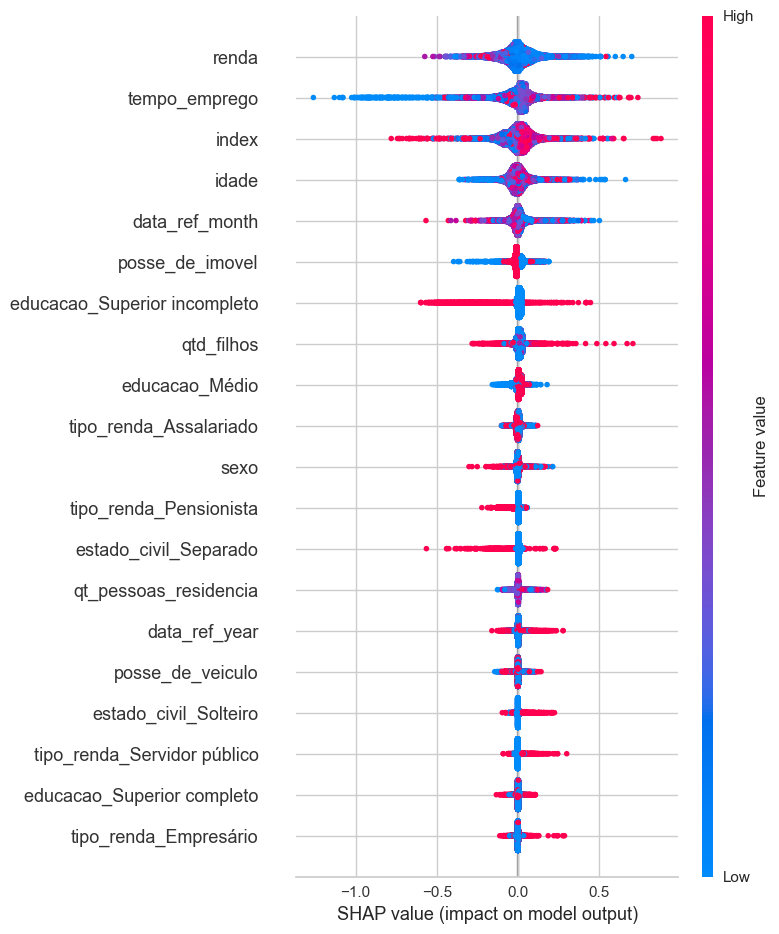

Transformation Pipeline and Model Successfully Saved
Pipeline(memory=FastMemory(location=/var/folders/sn/d8qmg6ks1ts4wgxf8nzfv6lr0000gn/T/joblib),
         steps=[('date_feature_extractor',
                 TransformerWrapper(exclude=None, include=['data_ref'],
                                    transformer=ExtractDateTimeFeatures(features=['day',
                                                                                  'month',
                                                                                  'year']))),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['index', 'qtd_filhos', 'idade',
                                             'tempo_em...
                                                               verbose=0))),
                ('onehot_encoding',
                 TransformerWrapper(exclude=None,
                                    include=['tipo_renda', 'educacao',
       

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
from pycaret.classification import *

# Carregar os dados
data = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Usar uma amostra menor dos dados
data_sample = data.sample(frac=0.1, random_state=123)  # Usando 10% dos dados

# Inicializar o ambiente do PyCaret com menos folds para acelerar o processo
exp = setup(data_sample, target='mau', session_id=123, use_gpu=False, fold=3, verbose=True)

# Comparar diferentes modelos
best_model = compare_models(fold=3)

# Treinar o modelo LightGBM
lightgbm = create_model('lightgbm', fold=3)

# Avaliar o modelo
evaluate_model(lightgbm)

# Interpretar o modelo
interpret_model(lightgbm)

# Salvar o modelo
save_model(lightgbm, 'modelo_lightgbm')

# Finalizar o ambiente do PyCaret
finalize_model(lightgbm)

# Gerar o pipeline de transformação
pipeline_transformacao = get_config('pipeline')

# Exibir o pipeline de transformação
print(pipeline_transformacao)









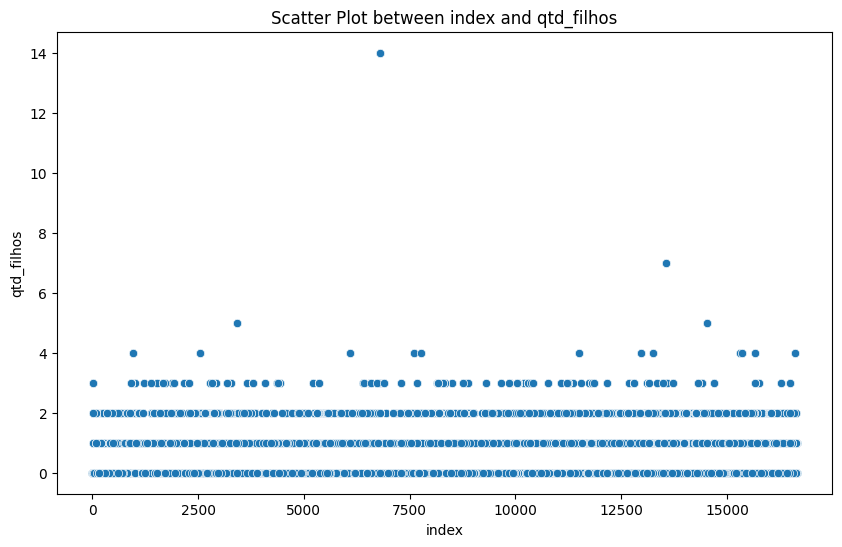

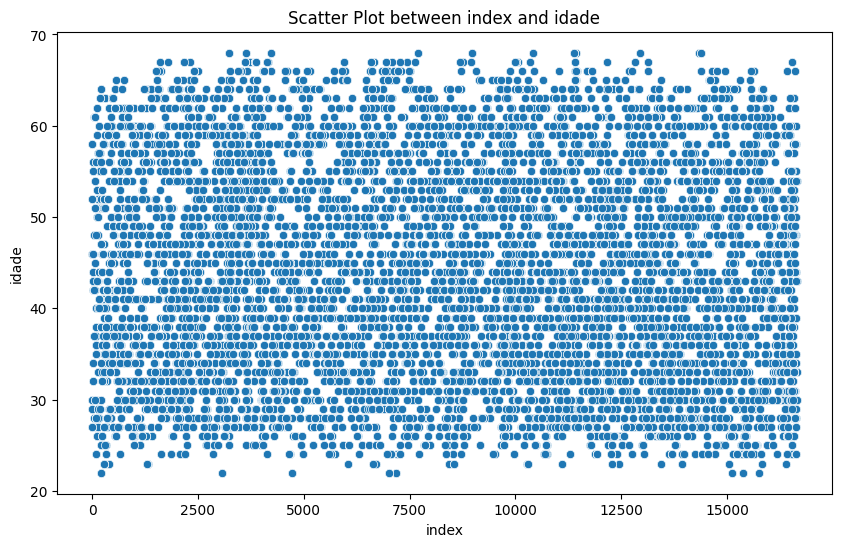

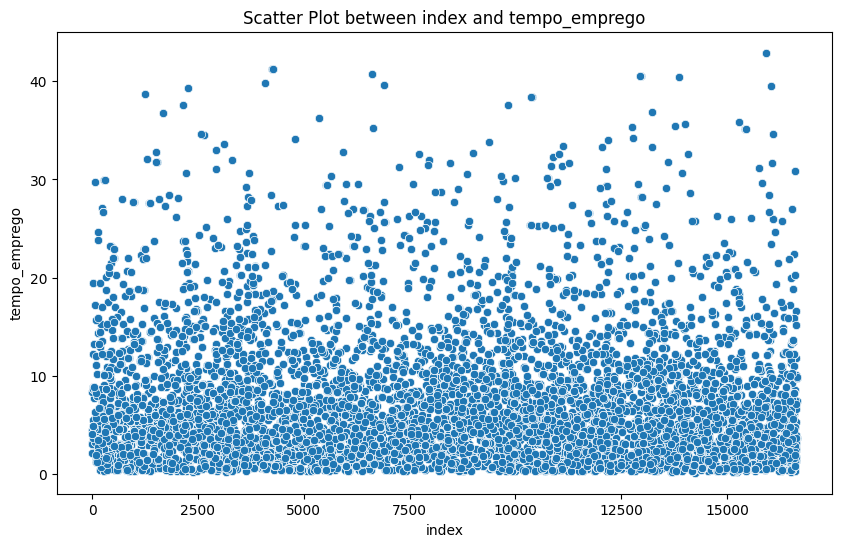

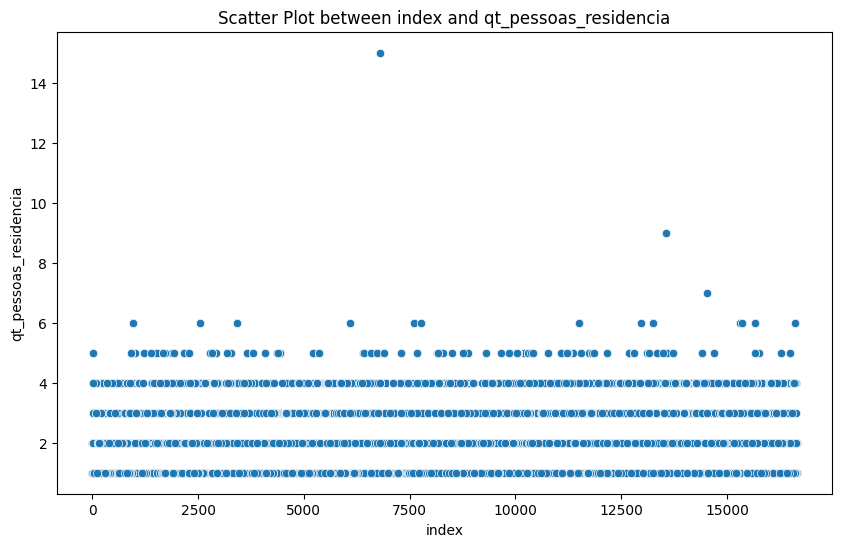

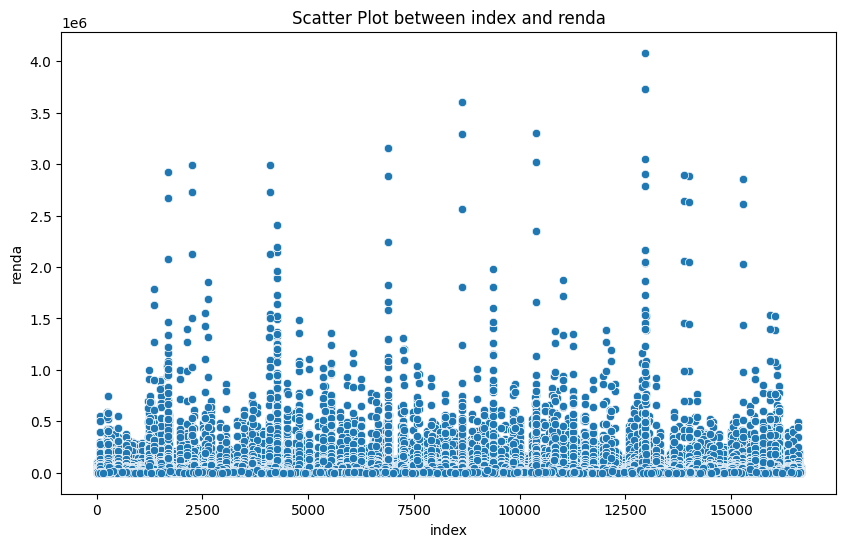

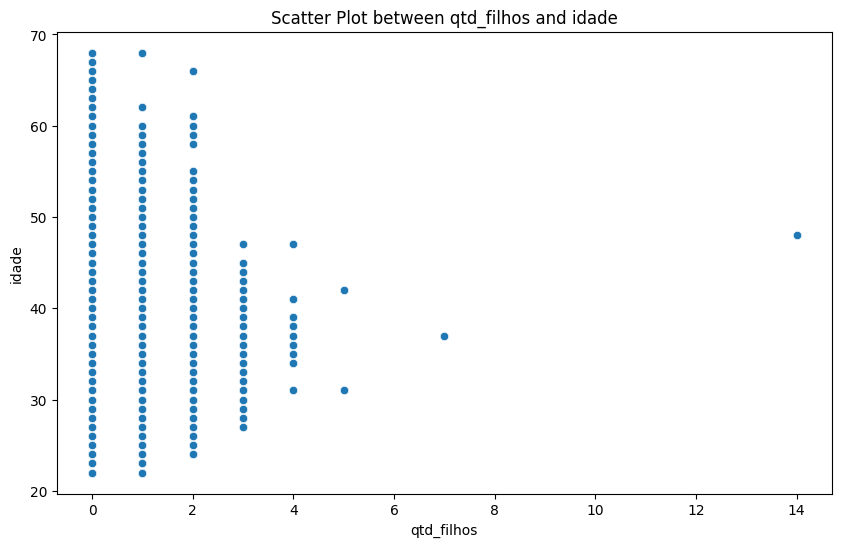

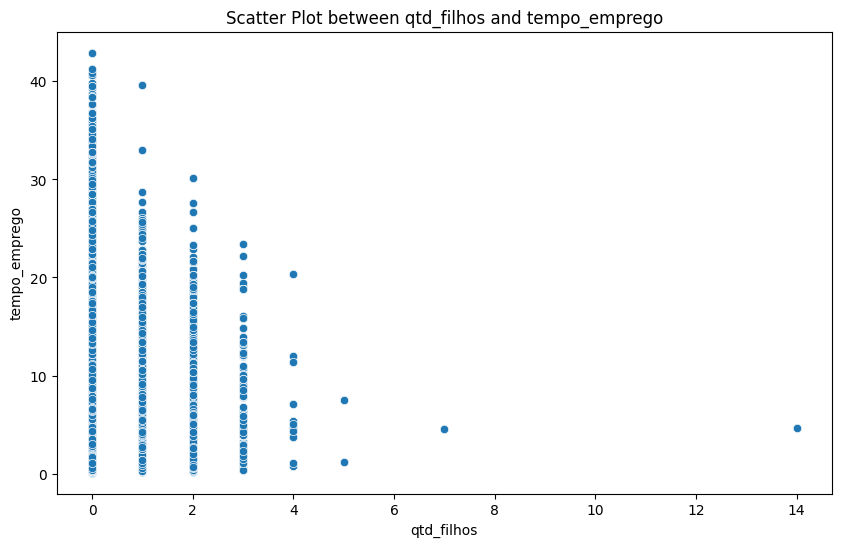

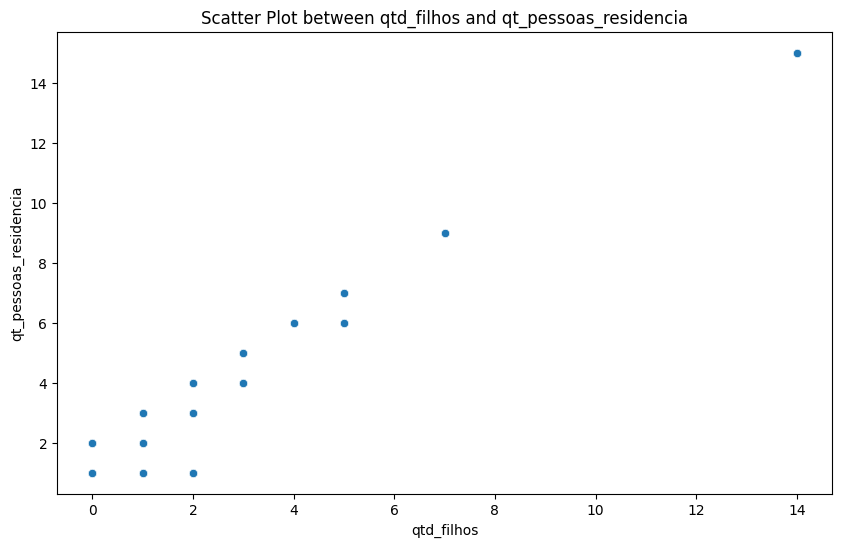

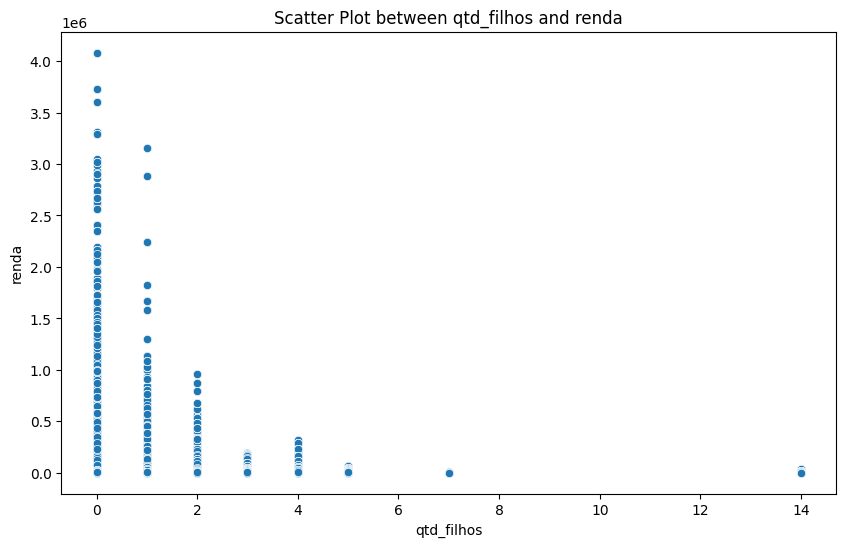

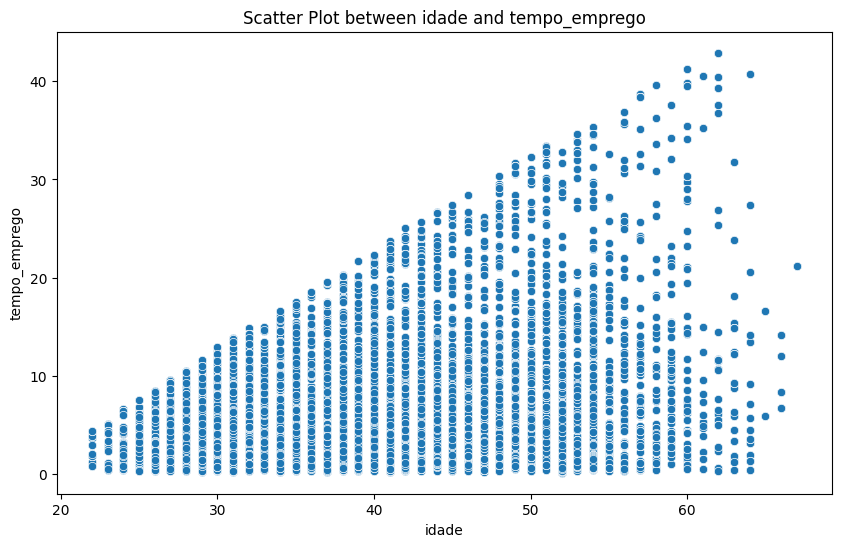

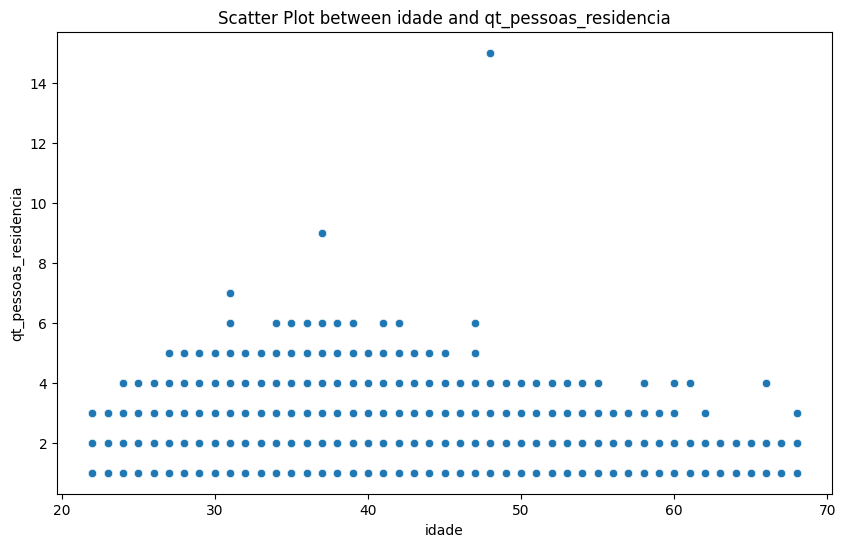

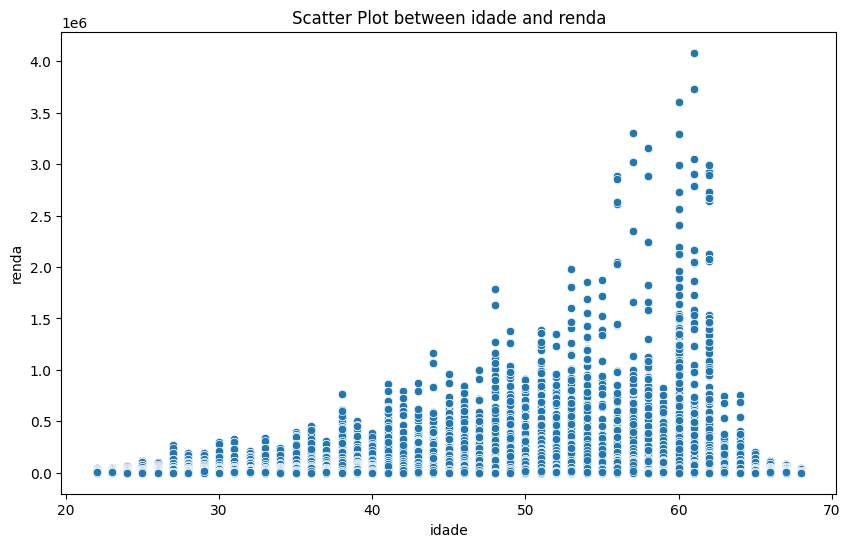

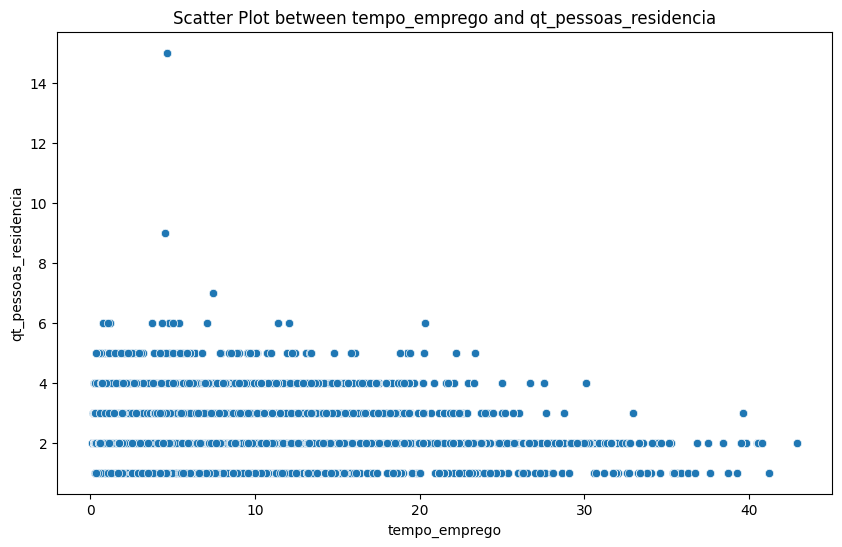

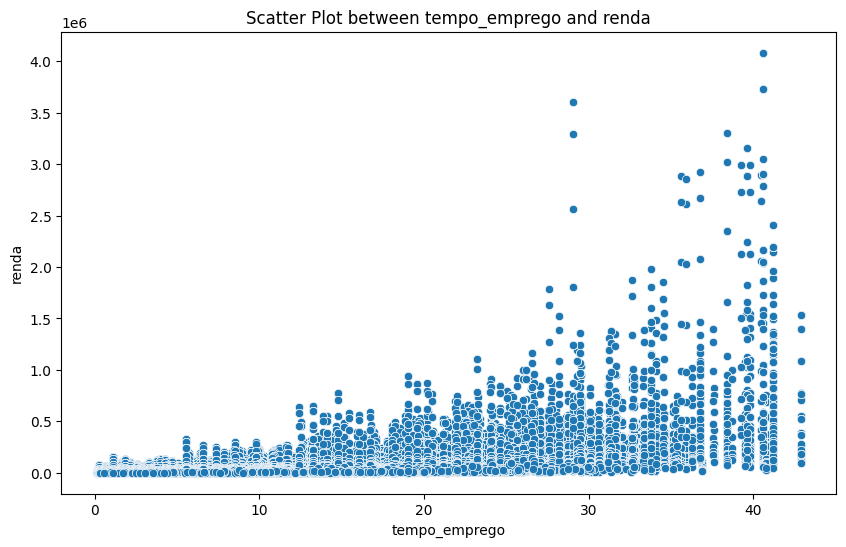

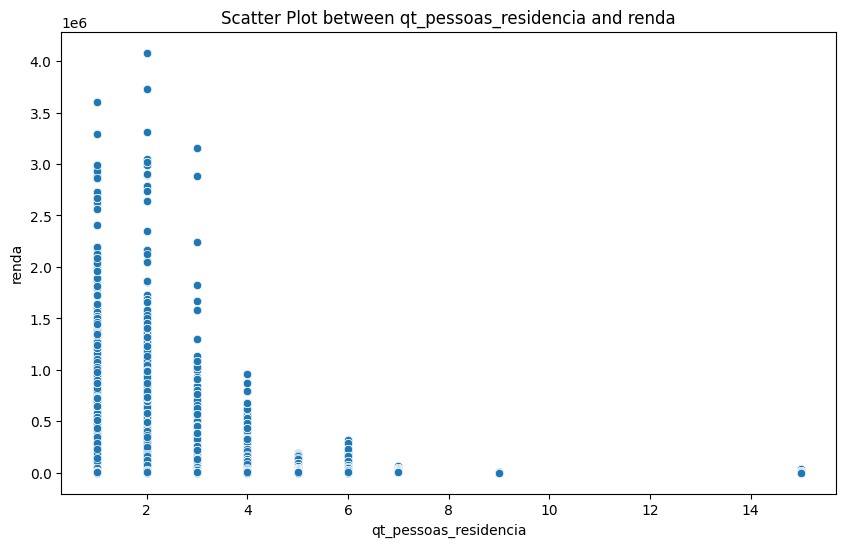

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar os dados
df = pd.read_feather('/Users/pedromartins/Downloads/Module 38/credit_scoring.ftr')

# Lista das colunas numéricas
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Gerar gráficos de dispersão para cada combinação de variáveis numéricas
for i in range(len(numerical_columns)):
    for j in range(i + 1, len(numerical_columns)):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=df, x=numerical_columns[i], y=numerical_columns[j])
        plt.title(f'Scatter Plot between {numerical_columns[i]} and {numerical_columns[j]}')
        plt.xlabel(numerical_columns[i])
        plt.ylabel(numerical_columns[j])
        plt.show()

